<a href="https://colab.research.google.com/github/spamandfriedeggs/CCS8-GitHub-Repository/blob/main/LC_3_GALVAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

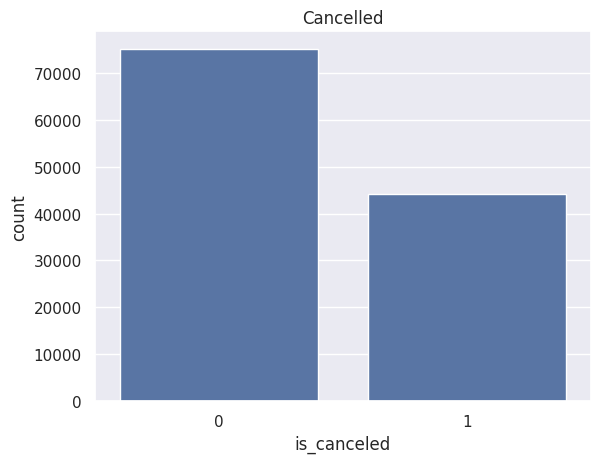

<ipython-input-8-647234a6aa00>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date_month_number'] = df_checkout['arrival_date_month'].map(month_dict)


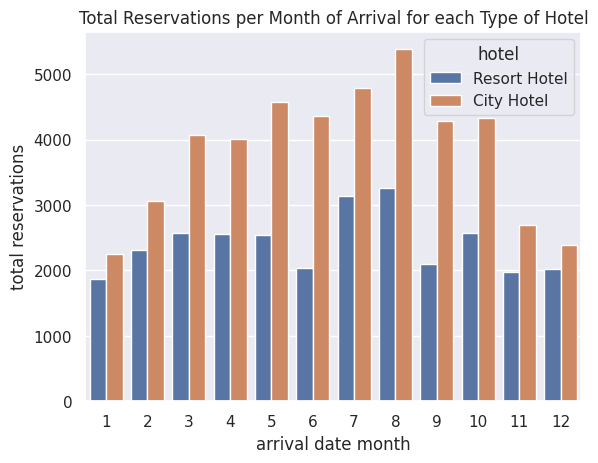

<ipython-input-8-647234a6aa00>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date'] = \
<ipython-input-8-647234a6aa00>:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['arrival_date'] = pd.to_datetime(df_checkout.arrival_date)


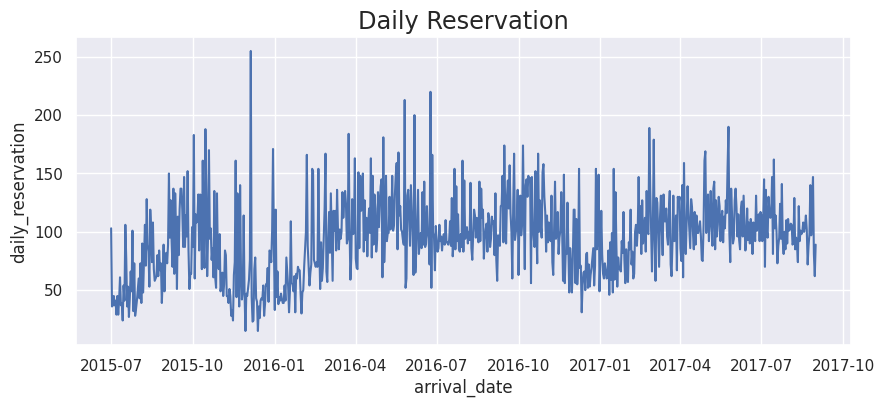

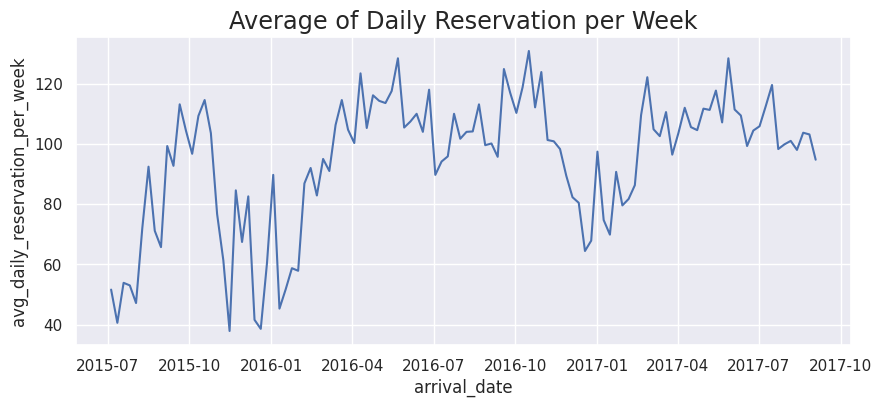

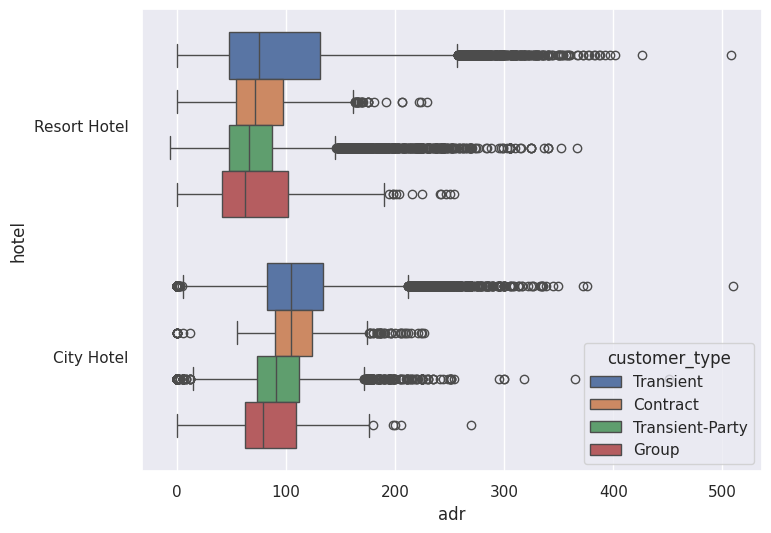

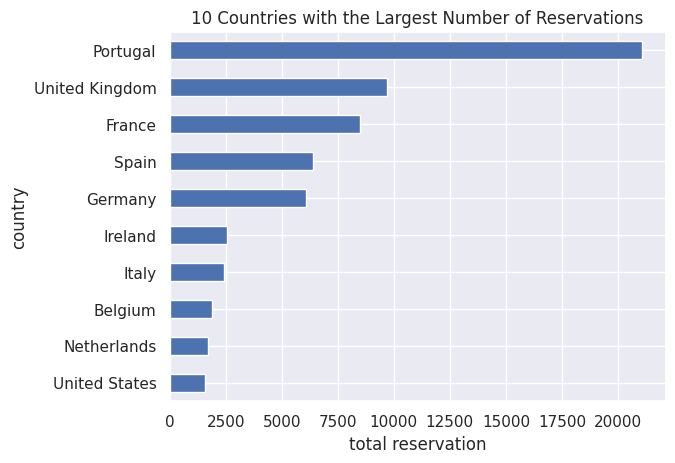

<ipython-input-8-647234a6aa00>:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checkout['total_guest'] = df_checkout.adults + df_checkout.children + df_checkout.babies


,46619
id,46619
hotel,City Hotel
is_canceled,0
lead_time,37
arrival_date_year,2016
arrival_date_month,January
arrival_date_week_number,3
arrival_date_day_of_month,12
stays_in_weekend_nights,0
stays_in_week_nights,2


In [ ]:
#This section is used to import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set()

#The code snippet below is used to import the dataset in CSV from the given link
df_hotels = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv')

#This allows the dataset to have a unique identifier column with the use of "id"
df_hotels = df_hotels.reset_index().rename(columns={'index':'id'})

#QUESTION 1:
#This section allows us to check the data type, the number and the percentage of null values, and the number of unique values for each column
def check_values(df):
    data = []
    for column in df.columns:
      data.append([
                  column, \
                  df[column].dtype, \
                  df[column].isna().sum(), \
                  round(100*(df[column].isna().sum()/len(df)),2), \
                  df[column].nunique()
                  ])
    return pd.DataFrame(columns=['Data_Features','Data_Type','Null','Null_Percentage','Unique_Value'], data=data)

#This is for checking the needed values for each column
check_values(df_hotels)

#QUESTION 2:
#This checks how many visitors canceled their reservation and how many did not
df_hotels.is_canceled.value_counts()
#This normalizes the values to be able to see the proportion for each value derived from the previous code snippet
df_hotels.is_canceled.value_counts(normalize=True)
#This creates a bar graph for us to be able to visualize the values
sns.countplot(data=df_hotels, x='is_canceled')
plt.title('Cancelled')
plt.show()

#QUESTION 3:
# a.) This shows the percentage of canceled reservations in City Hotel
round(100*(len(df_hotels[(df_hotels.hotel=='City Hotel')&(df_hotels.is_canceled==1)])/len(df_hotels[df_hotels.hotel=='City Hotel'])),2)
# b.) This shows the percentage of canceled reservations in Resort Hotel
round(100*(len(df_hotels[(df_hotels.hotel=='Resort Hotel')&(df_hotels.is_canceled==1)])/len(df_hotels[df_hotels.hotel=='Resort Hotel'])),2)

#QUESTION 4: This shows the visitors who did not cancel their reservation
df_checkout = df_hotels[df_hotels.is_canceled==0]

#QUESTION 5:
# a.) Shows the number of reservations per month of arrival for each type of hotel
df_checkout.groupby(['hotel','arrival_date_month'])['id'].nunique()
# c.) Changes the name of the months into months in numbers
import calendar
month_dict = {month: index for index, month in enumerate(calendar.month_name) if month}
month_dict
df_checkout['arrival_date_month_number'] = df_checkout['arrival_date_month'].map(month_dict)
#Makes a countplot to visualize the number of reservations per month of arrival for each type of hotel
sns.countplot(data=df_checkout, x='arrival_date_month_number',hue='hotel')
plt.xlabel('arrival date month')
plt.ylabel('total reservations')
plt.title('Total Reservations per Month of Arrival for each Type of Hotel')
plt.show()

#QUESTION 6:
# a.) Creates a new column named arrival_date which contains complete information about the year, month, and date of arrival
df_checkout['arrival_date'] = \
  df_checkout['arrival_date_year'].astype('str') + '-' +\
  df_checkout.arrival_date_month_number.astype('str').str.pad(2,fillchar='0') + '-' +\
  df_checkout.arrival_date_day_of_month.astype('str').str.pad(2,fillchar='0')
#Checks the values of "arrival_date" column
df_checkout['arrival_date']
# b.) Changes the column to datetime type
df_checkout['arrival_date'] = pd.to_datetime(df_checkout.arrival_date)
df_checkout['arrival_date']

#QUESTION 7:
# a.) Creates dataframe containing Daily reservation
df_daily_reservation = df_checkout.resample('D', on='arrival_date').size().reset_index().rename(columns={0:'daily_reservation'})
df_daily_reservation
#Creates a lineplot to visualize the number of daily reservations
plt.figure(figsize=(10,4))
sns.lineplot(data=df_daily_reservation, x='arrival_date', y='daily_reservation')
plt.title('Daily Reservation', fontsize='x-large')
plt.show()
# b.) Creates dataframe containing Average of daily reservation per week
df_avg_daily_reservation_per_week = round(df_checkout.resample('D', on='arrival_date').size().reset_index().rename(columns={0:'avg_daily_reservation_per_week'}).resample('W', on='arrival_date')['avg_daily_reservation_per_week'].mean().reset_index(),2)
df_avg_daily_reservation_per_week
#Creates a lineplot to visualize the number of average of daily reservations per week
plt.figure(figsize=(10,4))
sns.lineplot(data=df_avg_daily_reservation_per_week, x='arrival_date', y='avg_daily_reservation_per_week')
plt.title('Average of Daily Reservation per Week', fontsize='x-large')
plt.show()

#QUESTION 8
# a.) Shows the average ADR (Average Daily Rate) based on hotel type and customer type
round(df_checkout.groupby(['hotel','customer_type'])['adr'].mean(),2)
# b.) Shows which type of customer has the highest the average of ADR in each type of hotel
plt.figure(figsize=(8,6))
sns.boxplot(data=df_checkout, x='adr', y='hotel',hue='customer_type')
plt.show()

#QUESTION 9
#Shows the 10 countries with the largest number of reservations
df_country = pd.read_csv('https://gist.githubusercontent.com/tadast/8827699/raw/f5cac3d42d16b78348610fc4ec301e9234f82821/countries_codes_and_coordinates.csv')
df_country['code'] = df_country['Alpha-3 code'].str.replace('"','').str.strip()
df_merged = pd.merge(df_checkout[['id','country']],
                     df_country[['Country','code']],
                     left_on='country',
                     right_on='code',
                     indicator=True,
                     how='left')
df_merged
df_merged.Country.value_counts().head(10)
#Creates a horizontal bar chart to show the top 10 countries with the largest number of reservations
df_merged.Country.value_counts().head(10).sort_values(ascending=True).plot.barh()
plt.xlabel('total reservation')
plt.ylabel('country')
plt.title('10 Countries with the Largest Number of Reservations')
plt.show()

#QUESTION 10:
# a.) Shows how many average guests stay for each reservation
df_checkout['total_guest'] = df_checkout.adults + df_checkout.children + df_checkout.babies
round(df_checkout.total_guest.mean(),0)
# b.) Shows the highest number of guests and the reservation data row that has the highest number of guests
df_checkout.total_guest.max()
df_checkout[df_checkout.total_guest==df_checkout.total_guest.max()].T